In [1]:
# κάνω import τις βιβλιοθήκες

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime

In [2]:
usr = pd.read_csv('C:/Users/Lefteris/Desktop/Data-Science-Assigmnent-2020/data/users.txt')  # διαβάζω το table των users

<hr>
<li><b>Understand what each table/column represents.</b></li>
<hr>

In [3]:
usr.head(2) # εμφανίζω τα πρώτα 2 rows

,user_id,birth_year,country,city,created_date,user_settings_crypto_unlocked,plan,attributes_notifications_marketing_push,attributes_notifications_marketing_email,num_contacts,num_referrals,num_successful_referrals
0,user_0,1992,ES,Madrid,2018-09-10 18:46:42.843855,0,STANDARD,1.0,1.0,3,0,0
1,user_1,1985,LT,Klaipeda,2018-01-11 18:53:10.531146,1,STANDARD,NaN,NaN,75,0,0


 <li><b>user_id</b> : μοναδικός κωδικός για κάθε user που έχει κάνει εγγραφη στην εφαρμογή της τράπεζας(primary key του users fact table).</li>
 
 <li><b>birth_year</b> : date of birth του κάθε user.</li>
 
 <li><b>country</b> : η χώρα του κάθε χρήστη.</li>
 
 <li><b>city</b> : η πολύ του κάθε χρήστη.</li>
 
 <li><b>created_date</b> : πότε δημιουργήθηκε ο λογαριασμός για την εφαρμογή.</li>
 
 <li><b>user_settings_crypto_unlocked</b> : μια ρυθμιση που επιλέγει ο χρήστης για να δείξει αν εχει ξεκλειδώσει τα cryptocurrencies στο app(0 or 1).</li>
 
 <li><b>attributes_notifications_marketing_push</b> : αν έχει επιλέξει να του στέλνουν διαφημίσεις (0 or 1).</li>
 
 <li><b>attributes_notifications_marketing_email</b> : αν εχει επιλεξει να του στέλνουν διαφημίσεις με email (0 or 1).</li>
 
 <li><b>num_contacts</b> : αριθμός επαφών που έχει ο χρήστης.</li>
 
 <li><b>num_referrals</b> :  αριθμος που εχει προτείνει ο καθε χρήστης για να χρησιμοποιήσει το app (DROP γιατί όλη η στήλη έχει τιμή 0).</li>
 
 <li><b>num_successful_referrals </b> : πετυχημένα referrals (DROP γιατί όλη η στήλη έχει τιμή 0).</li>

<hr>
<li><b> Recognize if there are missing/wrong values in the data.</b></li>
<hr>

In [4]:
usr.isna().sum() # έχω missing values σε 2 column

user_id                                        0
birth_year                                     0
country                                        0
city                                           0
created_date                                   0
user_settings_crypto_unlocked                  0
plan                                           0
attributes_notifications_marketing_push     5260
attributes_notifications_marketing_email    5260
num_contacts                                   0
num_referrals                                  0
num_successful_referrals                       0
dtype: int64

<i>Στα δυό παρακάτω κελιά βλέπω τα ποσοστά των τιμων που παίρνουν τα δύο columns για να επιλέξω την καλύτερη στρατηγική να τα γεμίσω.</i>

In [5]:
x=usr['attributes_notifications_marketing_push'] 

count=0
count1=0
for i in x:
    if i==0.0:
        count+=1
    elif i==1.0:
        count1+=1
print('0:',count,'|',count *100/10284,'%')
print('1:',count1,'|',count1 *100/10284,'%')
print(count+count1)
print(x.isna().sum(),'|',x.isna().sum() *100/len(x),'%')

print(count1 *100/len(x))

0: 532 | 5.173084402956048 %
1: 9752 | 94.82691559704395 %
10284
5260 | 33.83942357179619 %
62.73803396809058


In [6]:
y=usr['attributes_notifications_marketing_email'] 

count2=0
count3=0
for i in y:
    if i==0.0:
      
        count2+=1
    elif i==1.0:
      
        count3+=1
print('0:',count2,'|',count2 *100/10284,'%')
print('1:',count3,'|',count3 *100/10284,'%')
print(count2+count3)
print(y.isna().sum(),'|',y.isna().sum() *100/len(y),'%')

0: 1075 | 10.453131077401789 %
1: 9209 | 89.54686892259821 %
10284
5260 | 33.83942357179619 %


In [7]:
usr[usr['city'].apply(lambda x: x.isdigit())].head(2) # ελέχγω αν στη στήλη city εχω καποιον αριθμό αντι για όνομα πόλης

,user_id,birth_year,country,city,created_date,user_settings_crypto_unlocked,plan,attributes_notifications_marketing_push,attributes_notifications_marketing_email,num_contacts,num_referrals,num_successful_referrals
300,user_300,1991,FR,78500,2018-10-17 20:05:39.676975,0,STANDARD,1.0,1.0,0,0,0
1147,user_1147,1991,FR,92160,2018-07-01 21:35:59.257586,1,GOLD,1.0,1.0,5,0,0


In [8]:
df=usr.copy() # κανω ένα αντίγραφο για να επεξεργαστώ λίγο παραπάνω το table

df.drop(['num_successful_referrals','num_referrals'],axis=1,inplace=True) # διαγράφω τις δύο στήλες

df['city']=df['city'].apply(lambda x : x.lower()) 

df['country']=df['country'].apply(lambda x : x.lower())

In [9]:
df.drop(['city'],axis=1,inplace=True) # διαγράφω πόλεις 

In [10]:
now = datetime.datetime.now()

print(now.year-usr['birth_year'].min(),'years old',now.year-usr['birth_year'].max(),'years old') #ο μεγαλύτερος και ο μικρότερος user

91 years old 19 years old


In [11]:
df['age']=now.year-df['birth_year'] #εβαλα ενα νεο column με την ηλικια του user


In [12]:
df['plan'].replace({'STANDARD':0,'SILVER':1,'GOLD':2},inplace=True) #STANDARD = 0 ,SILVER = 1 , GOLD = 2


In [13]:
df.drop(['user_id','birth_year','created_date'],axis=1,inplace=True)

In [14]:
df.head(2)


,country,user_settings_crypto_unlocked,plan,attributes_notifications_marketing_push,attributes_notifications_marketing_email,num_contacts,age
0,es,0,0,1.0,1.0,3,28
1,lt,1,0,NaN,NaN,75,35


<hr>
<li> <b> Outliers <b> </li>
<hr>

In [15]:
df['num_contacts'].describe()


count    15544.000000
mean        17.874228
std         47.549929
min          0.000000
25%          0.000000
50%          5.000000
75%         19.000000
max       2918.000000
Name: num_contacts, dtype: float64

In [16]:
df['new_num_contacts']=np.where(df['num_contacts']>=47,47,df['num_contacts'])

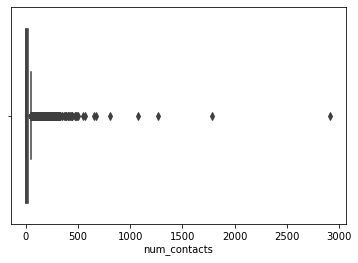

In [17]:
sns.boxplot(df['num_contacts']) #with outliers

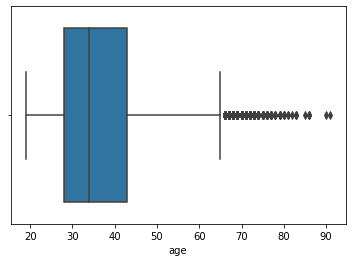

In [18]:
sns.boxplot(df['age']) # with outliers

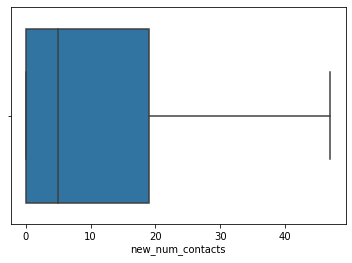

In [19]:
 sns.boxplot(df['new_num_contacts']) # without outliers

In [20]:
df['new_age']=np.where(df['age']>=65,65,df['age'])

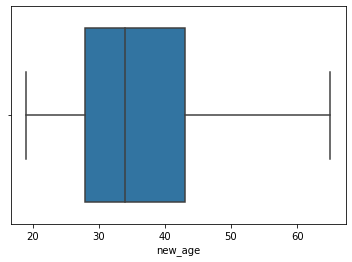

In [21]:
sns.boxplot(df['new_age']) # without outliers

In [22]:
df.drop(['age','num_contacts'],axis=1,inplace=True)

In [23]:
df

,country,user_settings_crypto_unlocked,plan,attributes_notifications_marketing_push,attributes_notifications_marketing_email,new_num_contacts,new_age
0,es,0,0,1.0,1.0,3,28
1,lt,1,0,NaN,NaN,47,35
2,ie,0,0,NaN,NaN,47,24
3,ie,0,0,NaN,NaN,47,39
4,gb,0,0,NaN,NaN,0,28
...,...,...,...,...,...,...,...
15539,pl,0,0,1.0,1.0,0,23
15540,pl,0,0,NaN,NaN,0,35
15541,gb,0,0,1.0,1.0,16,42
15542,ie,0,2,1.0,1.0,44,43


<hr>
<li> <b> Fix NaN </b> </li>
<hr>

In [24]:

mask = df['attributes_notifications_marketing_push'].isna()
ind = df['attributes_notifications_marketing_push'].loc[mask].sample(frac=0.94).index
df.loc[ind,'attributes_notifications_marketing_push'] = 1
df['attributes_notifications_marketing_push']= df['attributes_notifications_marketing_push'].fillna(0)


In [25]:
df['attributes_notifications_marketing_push'].value_counts()

1.0    14696
0.0      848
Name: attributes_notifications_marketing_push, dtype: int64

In [26]:
mask = df['attributes_notifications_marketing_email'].isna()
ind = df['attributes_notifications_marketing_email'].loc[mask].sample(frac=0.89).index
df.loc[ind,'attributes_notifications_marketing_email'] = 1
df['attributes_notifications_marketing_email']= df['attributes_notifications_marketing_email'].fillna(0)

In [27]:
df['attributes_notifications_marketing_email'].value_counts()

1.0    13890
0.0     1654
Name: attributes_notifications_marketing_email, dtype: int64

<hr>
<li> <b> One Hot Encode without Scikit-learn</b> </li>
<hr>

In [28]:
df['country'].value_counts().sort_values(ascending=False)
top_10=[ x for x in df['country'].value_counts().sort_values(ascending=False).head(15).index]
others=[ x for x in df['country'].value_counts().sort_values(ascending=False).tail(25).index]


In [29]:
for label in top_10:
    df[label]=np.where(df['country']==label,1,0)

In [30]:
other_country=[]
country_column=df['country']
for i in country_column:
    for label in others:
        if i==label:
            other_country.append(1)
        else:
            other_country.append(0)

In [31]:

df['other_country']=pd.DataFrame(other_country)
df

,country,user_settings_crypto_unlocked,plan,attributes_notifications_marketing_push,attributes_notifications_marketing_email,new_num_contacts,new_age,gb,pl,fr,...,lt,pt,mt,de,ch,cz,it,gr,cy,other_country
0,es,0,0,1.0,1.0,3,28,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,lt,1,0,1.0,1.0,47,35,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,ie,0,0,1.0,1.0,47,24,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ie,0,0,0.0,1.0,47,39,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,gb,0,0,1.0,1.0,0,28,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15539,pl,0,0,1.0,1.0,0,23,0,1,0,...,0,0,0,0,0,0,0,0,0,0
15540,pl,0,0,1.0,1.0,0,35,0,1,0,...,0,0,0,0,0,0,0,0,0,0
15541,gb,0,0,1.0,1.0,16,42,1,0,0,...,0,0,0,0,0,0,0,0,0,0
15542,ie,0,2,1.0,1.0,44,43,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
usr['country'].value_counts().tail(25).sum()

1307

In [46]:
usr['country'].value_counts().head(15).mean()

949.1333333333333

In [34]:
df.drop(['country'],axis=1,inplace=True)


In [47]:
df

,user_settings_crypto_unlocked,attributes_notifications_marketing_push,attributes_notifications_marketing_email,new_num_contacts,new_age,gb,pl,fr,ie,ro,...,pt,mt,de,ch,cz,it,gr,cy,other_country,paid
0,0,1.0,1.0,3,28,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1.0,1.0,47,35,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1.0,1.0,47,24,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0.0,1.0,47,39,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1.0,1.0,0,28,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15539,0,1.0,1.0,0,23,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15540,0,1.0,1.0,0,35,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15541,0,1.0,1.0,16,42,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15542,0,1.0,1.0,44,43,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,2


<li> <b> Target Column</b> </li>

In [36]:
df['paid']=df['plan']

In [37]:
df.drop(['plan'],axis=1,inplace=True)

<hr>

In [48]:
df.head()

,user_settings_crypto_unlocked,attributes_notifications_marketing_push,attributes_notifications_marketing_email,new_num_contacts,new_age,gb,pl,fr,ie,ro,...,pt,mt,de,ch,cz,it,gr,cy,other_country,paid
0,0,1.0,1.0,3,28,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1.0,1.0,47,35,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1.0,1.0,47,24,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0.0,1.0,47,39,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1.0,1.0,0,28,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
df.to_csv('users-eda.txt',index=True)

<hr>